# Check ICA
The main purpose of the code in this notebook is to identify noise components in the ICA solutions generated in 'run_ica.py'


- Laura: 0108 + 0110
- Aleks: 0109 + 0111
- Luke: 0112 + 0113
- Pernille: 0114
- Christoffer: 0115

In [ ]:
import mne
import json
import os
from pathlib import Path

# loading in the txt file with the channels that should be labeled as bad channels
with open('../session_info.txt', 'r') as f:
    file = f.read()
    session_info = json.loads(file)

In [ ]:
MEG_data_path = Path("/work/834761")
subject = "0108"
subject_folder = "20230928_000000"
recording_name = ['001.self_block1',  '002.other_block1', '003.self_block2',  '004.other_block2', '005.self_block3',  '006.other_block3'][0]
ICA_path = Path("../ICA") / subject / f"{recording_name}-ica.fif"
# get the fif file in the folder by listing files in path
fif_file_path = list((MEG_data_path / subject / subject_folder / "MEG" / recording_name / "files").glob("*.fif"))[0]



In [ ]:
# Loading in the raw data
raw = mne.io.read_raw_fif(fif_file_path, on_split_missing='warn');
raw.load_data();
raw.pick_types(meg=True, eeg=False, stim=True)

### EXCLUDING BAD CHANNELS ###
# using dict[] notation to get the bad channels for the specific file. Not using dict.get() as this does not raise a key-error if the key does not exist
bad_channels_file = session_info[subject][recording_name]['bad_channels']

# marking the channels as bad
raw.info['bads'] = bad_channels_file

# cropping beginning and end of recording
tmin = session_info[subject][recording_name]['tmin']
tmax = session_info[subject][recording_name]['tmax']

cropped = raw.copy().crop(tmin = tmin, tmax = tmax)
del raw

### HIGH PASS FILTERING ###
filt_raw = cropped.copy().filter(l_freq=1, h_freq=40)
del cropped

### ICA ###
ica = mne.preprocessing.read_ica(ICA_path)
ica.apply(filt_raw)

Displaying components 0-19
Creating RawArray with float64 data, n_channels=20, n_times=364000
    Range : 89000 ... 452999 =     89.000 ...   452.999 secs
Ready.


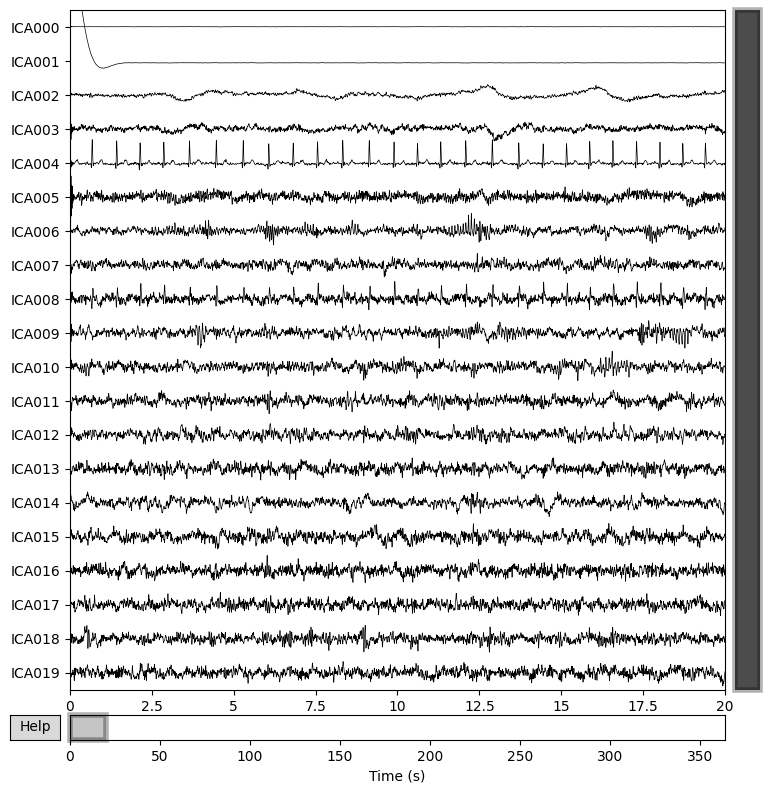

Displaying components 20-39
Creating RawArray with float64 data, n_channels=20, n_times=364000
    Range : 89000 ... 452999 =     89.000 ...   452.999 secs
Ready.


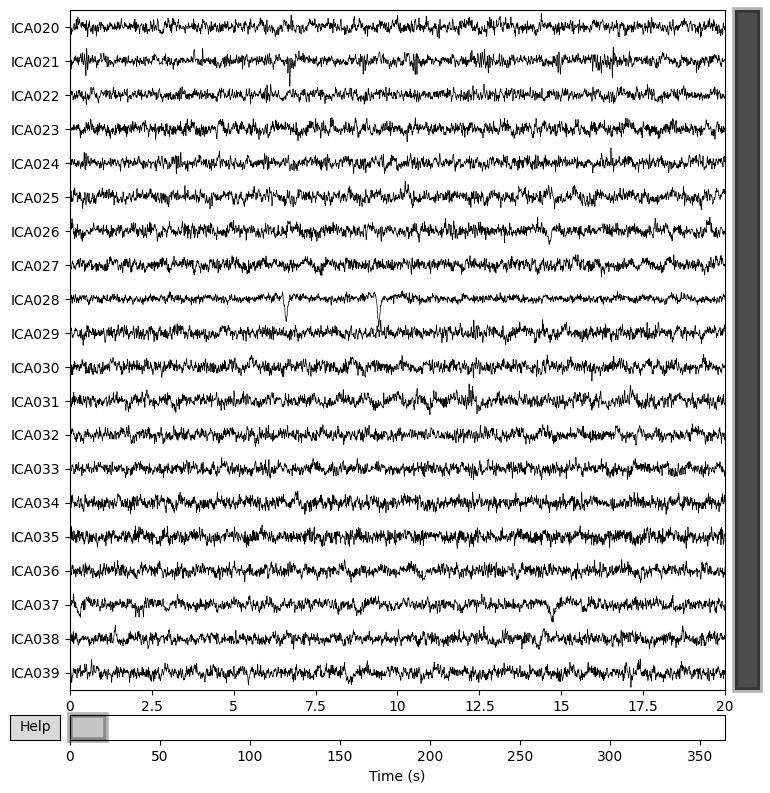

Displaying components 40-57
Creating RawArray with float64 data, n_channels=18, n_times=364000
    Range : 89000 ... 452999 =     89.000 ...   452.999 secs
Ready.


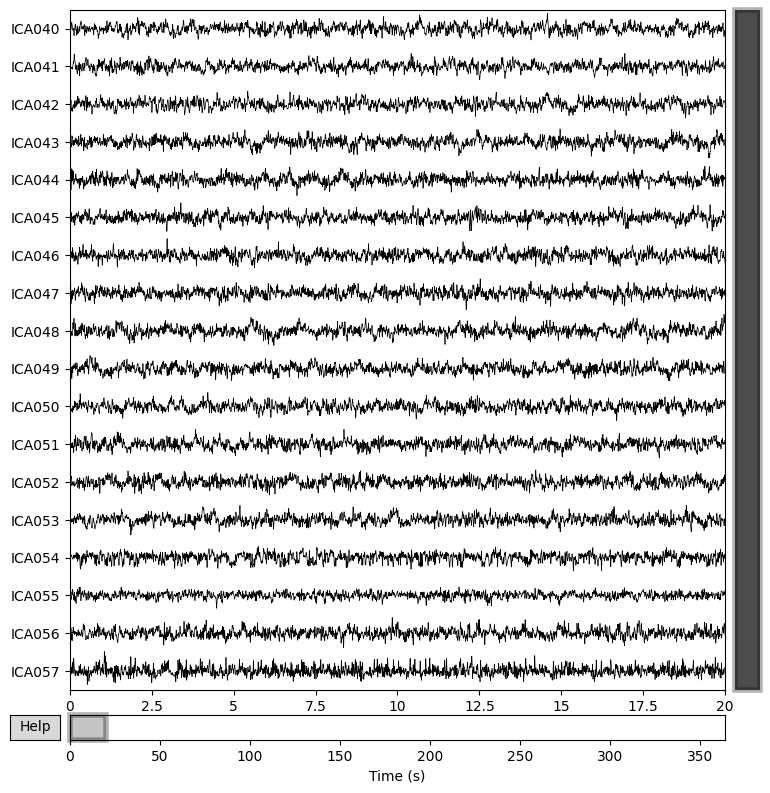

In [5]:
# Define batch size
batch_size = 20

# Loop through all components in batches
for start_pick in range(0, ica.n_components_, batch_size):
    end_pick = min(start_pick + batch_size, ica.n_components_)
    print(f"Displaying components {start_pick}-{end_pick-1}")
    ica.plot_sources(inst=filt_raw, picks=range(start_pick, end_pick))

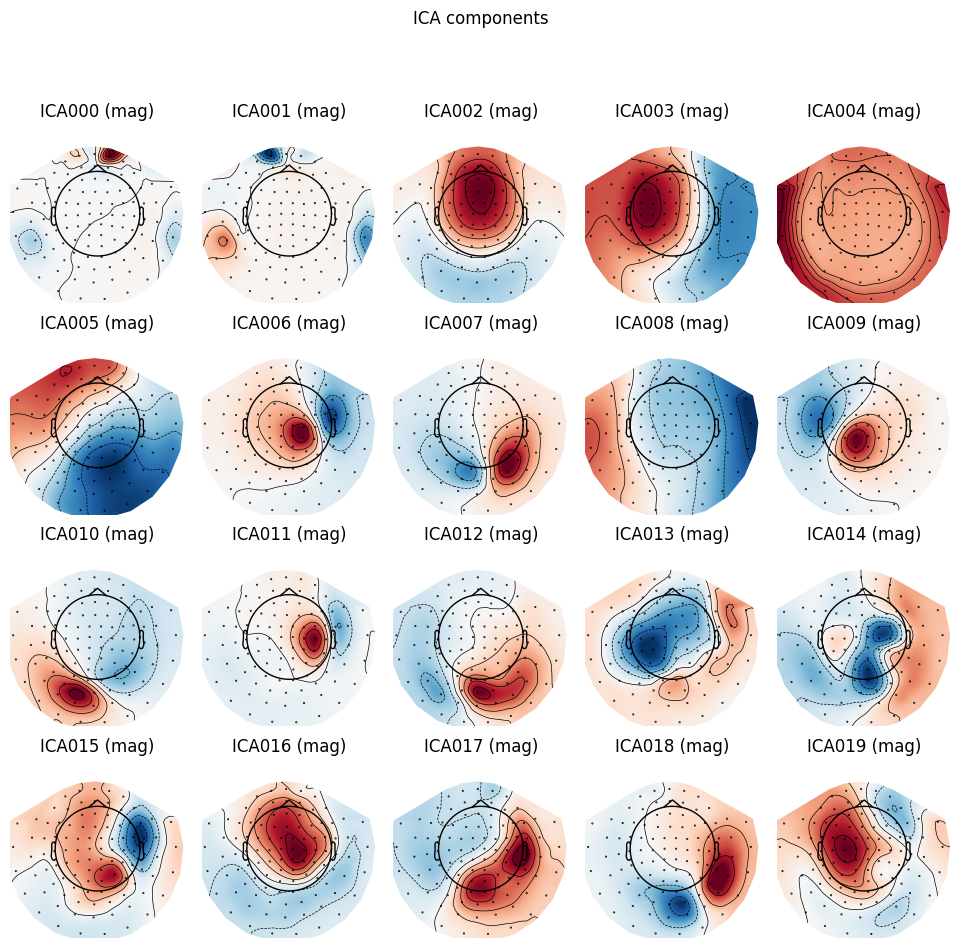

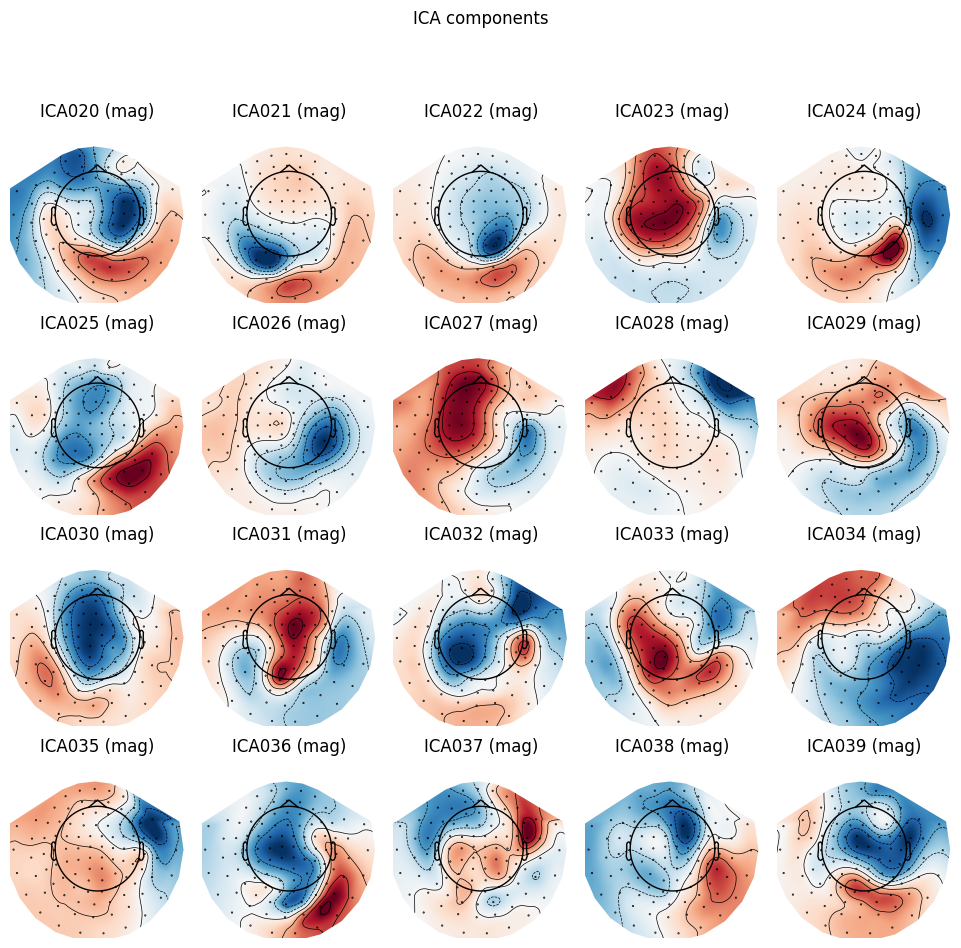

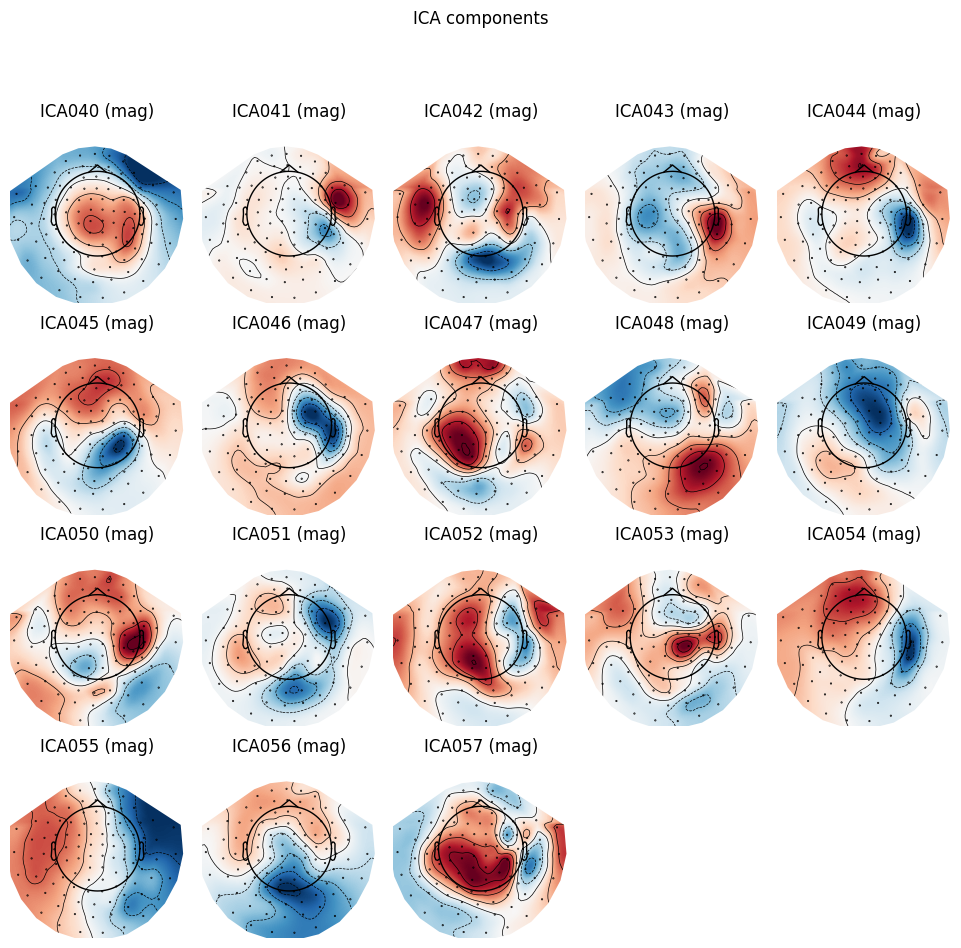

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 18 Axes>]

In [6]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated


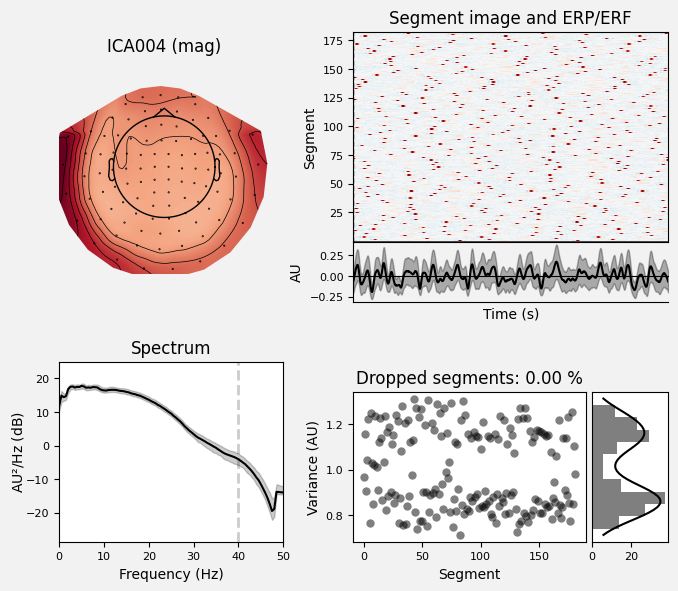

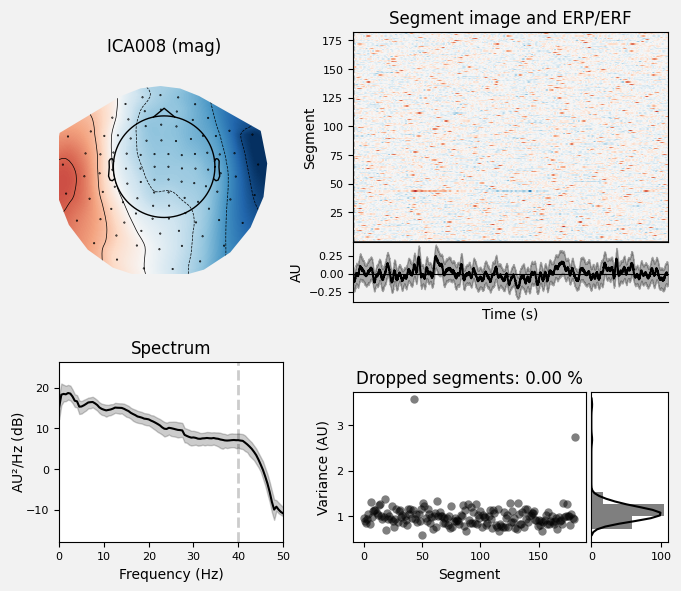

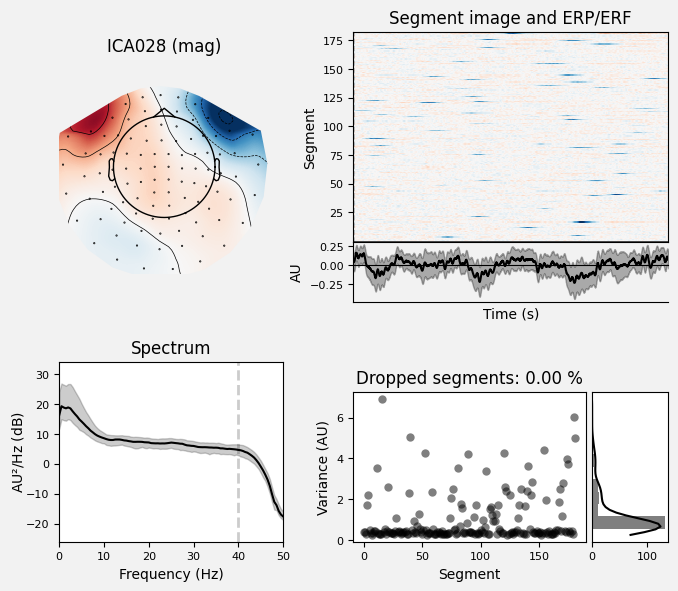

In [7]:
noise_components = [4, 8, 28]


# plot to check that you have the correct indices
ica.plot_properties(filt_raw, noise_components);

## SEND SUBJECT + RECORDING NAME AND INDICES OF NOISY COMPONENTS TO LAURA <33 Use below to print and copy

In [8]:
print(f"Subject: {subject}, recording: {recording_name}, noise components: {noise_components}")

Subject: 0108, recording: 001.self_block1, noise components: [4, 8, 28]
